## Exploratory Analysis of Census Income Data
* Objective: Predict whether income exceeds $50K/yr based on census data, also known as Adult dataset
* Data cleanup approach: TBD
* Machine Learning Models: TBD

### Source of information: 
* https://archive.ics.uci.edu/dataset/20/census+income



## Install and import the required libraries

In [1]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from collections import Counter

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import warnings
from sklearn.metrics import balanced_accuracy_score
warnings.filterwarnings("ignore")

import seaborn as sns

-------------------------

## Data Preparation
* Upload all the source files into /resources folder and add column headers: 
  * adult.data - which is used as the train data
  * adult.test - which is used as the test data
  * the 2 datasets are combined into one called census_combined_df going forward
* Check the tables to understand data types, missing values, and fix them for better data quality

In [2]:
# Import the data
census_df = pd.read_csv('./resources/adult.data')
census_test_df = pd.read_csv('./resources/adult.test', skiprows=1) # skip the first row as it might contain headers


In [3]:
# Display the first 10 rows of the data
display(census_df.head(10))
display(census_test_df.head(10))

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
5,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
7,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
8,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
9,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.


In [4]:
# Add labels to the columns of the census_df
census_df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

census_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
# Add labels to the columns of the census_test_df
census_test_df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

census_test_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
5,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
7,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
8,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
9,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.


In [6]:
# Combine the census_df and census_test_df
census_combined_df = pd.concat([census_df, census_test_df])

In [7]:
# Check how many rows of census_df
census_combined_df.shape

(48840, 15)

In [8]:
# Describe census_df
census_combined_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48840.000000,4.884000e+04,48840.000000,48840.000000,48840.000000,48840.000000
mean,38.643857,1.896657e+05,10.078092,1079.067301,87.505897,40.422400
std,13.710652,1.056048e+05,2.570954,7452.168393,403.012415,12.391697
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175535e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376472e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Check for missing values
census_combined_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
# Check unique values in the each column
for column in census_combined_df.columns:
    print(column)
    print(census_combined_df[column].unique())
    print()

age
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

workclass
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt
[ 83311 215646 234721 ... 173449  89686 350977]

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' 

In [11]:
# The workclass, occupation, and native-country columns have a value '?' which means it is a missing value. 
# Note some of these ? have extra spaces around them
# We will replace it with a NaN value
census_combined_df['workclass'] = census_combined_df['workclass'].replace(r'^\s*\?\s*$', np.nan, regex=True)
census_combined_df['occupation'] = census_combined_df['occupation'].replace(r'^\s*\?\s*$', np.nan, regex=True)
census_combined_df['native-country'] = census_combined_df['native-country'].replace(r'^\s*\?\s*$', np.nan, regex=True)

# From all records, remove any extra spaces around any values
census_combined_df = census_combined_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# From all records, remove dot character around any values
census_combined_df = census_combined_df.apply(lambda x: x.str.replace('.', '') if x.dtype == "object" else x)

In [12]:
# Drop all records that contain missing values (NaN)
census_combined_df.dropna(inplace=True)

In [13]:
# Check how many rows of census_df
census_combined_df.shape

(45220, 15)

In [14]:
# Remove duplicates
census_combined_df = census_combined_df.drop_duplicates()

In [15]:
# Check how many rows of census_df
census_combined_df.shape

(45173, 15)

In [16]:
# Check unique values in the each column
# Make sure there are no "?", ".", or extra spaces in the values
for column in census_combined_df.columns:
    print(column)
    print(census_combined_df[column].unique())
    print()

age
[50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]

workclass
['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']

fnlwgt
[ 83311 215646 234721 ... 173449  89686 350977]

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']

education-num
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]

marital-status
['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation
['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-F

##### For the Combined datasets, we removed 7.5% data with null values (approx 3604) that originally had ? sign and dropped 47 duplicate values. 
##### We now work with 45,173 rows from originally 48,840 rows

-------------------------

## Create a basic visualization for the combined data to understand any possible biases or imbalanced data

<Figure size 640x480 with 0 Axes>

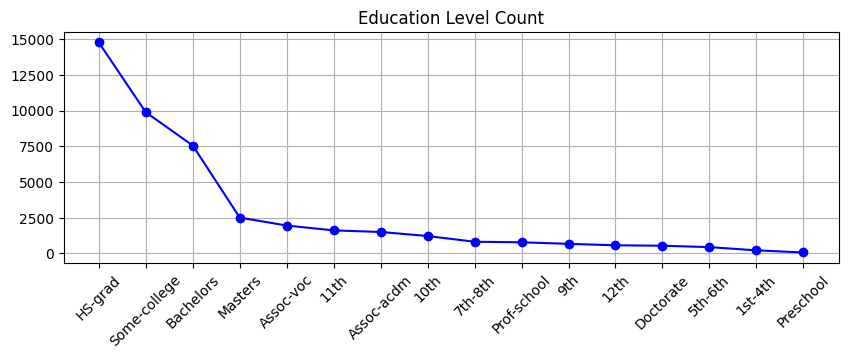

In [17]:
# Create a visualization of the education column

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['education'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Education Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

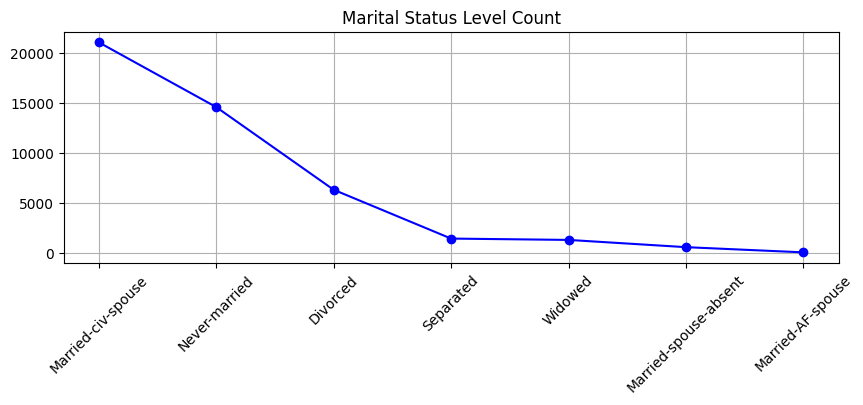

In [18]:
# Create a visualization of the marital status column

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['marital-status'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Marital Status Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

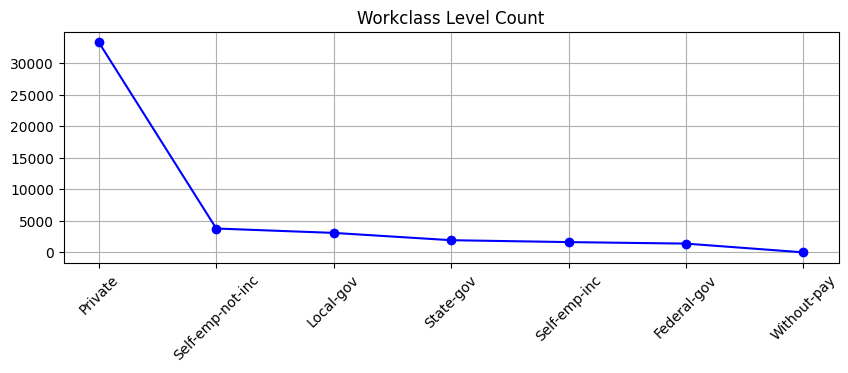

In [19]:
# Create a visualization of the workclass column 
plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['workclass'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Workclass Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

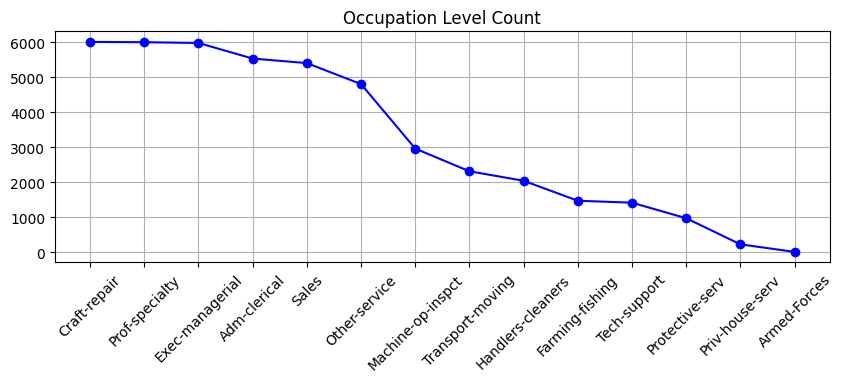

In [20]:
# Create a visualization of the occupation column 

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['occupation'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Occupation Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

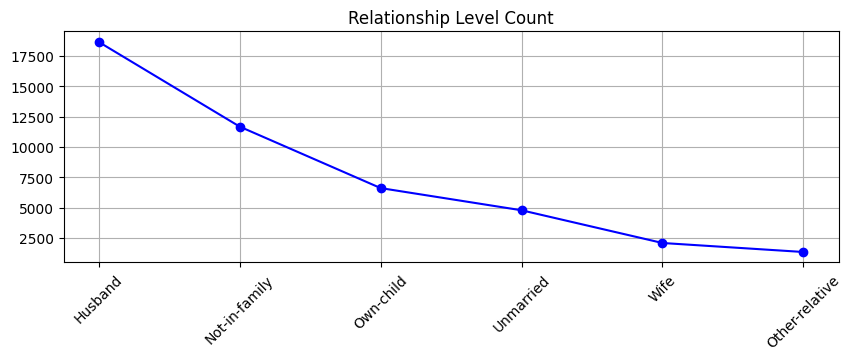

In [21]:
# Create a visualization of the relationship column 

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['relationship'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Relationship Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

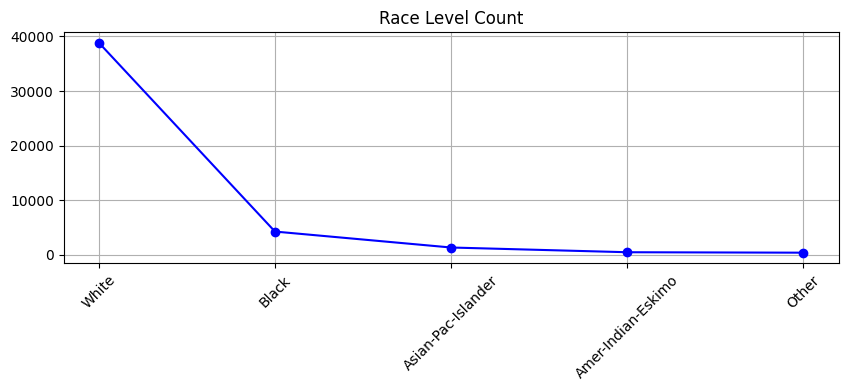

In [22]:
# Create a visualization of the race column 

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['race'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Race Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

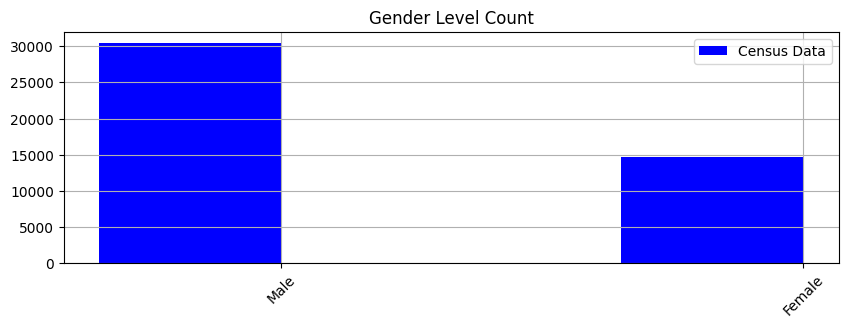

In [23]:
# Create a visualization of the sex column 
plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['sex'].value_counts()
width = 0.35

index = np.arange(len(train_work_counts.index))

plt.bar(index - width/2, train_work_counts.values, width, label='Census Data', color='blue')

plt.xticks(index, train_work_counts.index, rotation=45)
plt.title('Gender Level Count')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

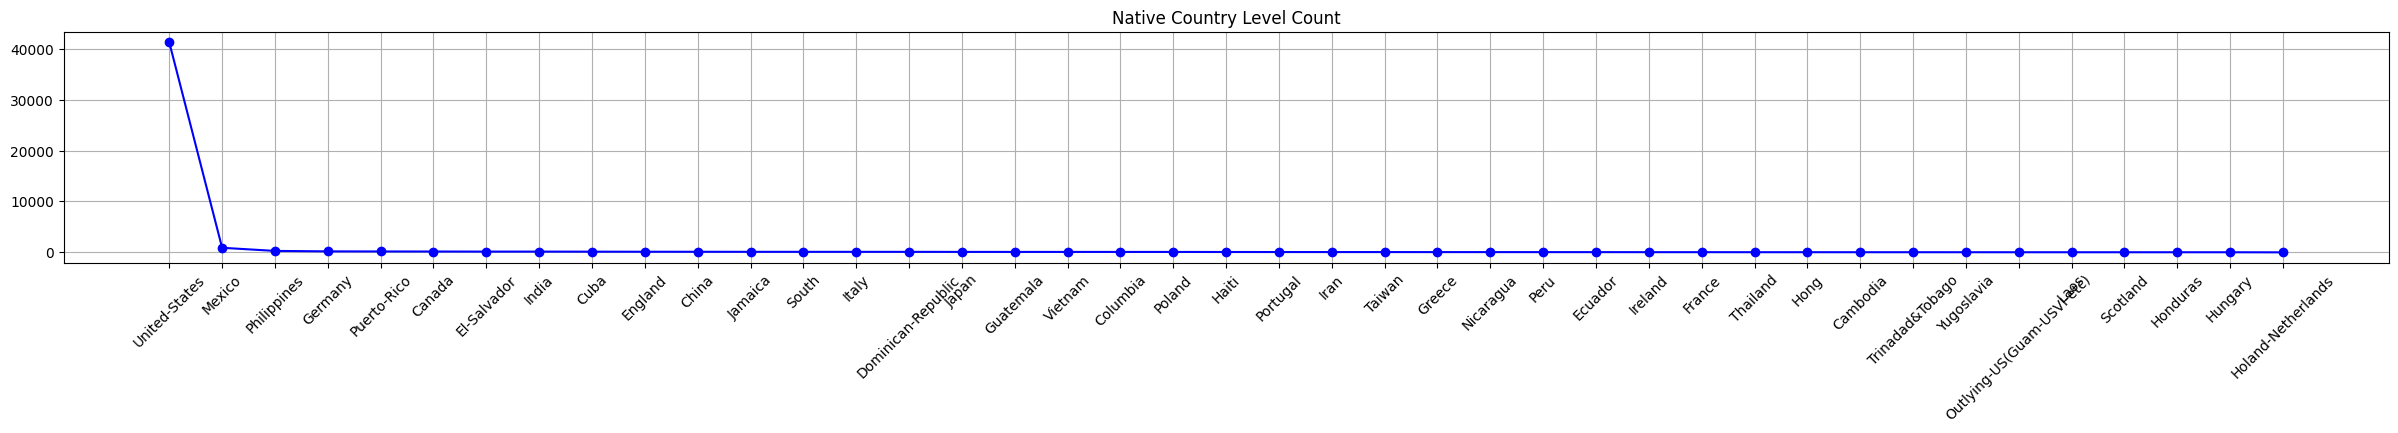

In [24]:
# Create a visualization of the native country column 
plt.clf()
plt.figure(figsize=(30, 3))
train_work_counts = census_combined_df['native-country'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Native Country Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

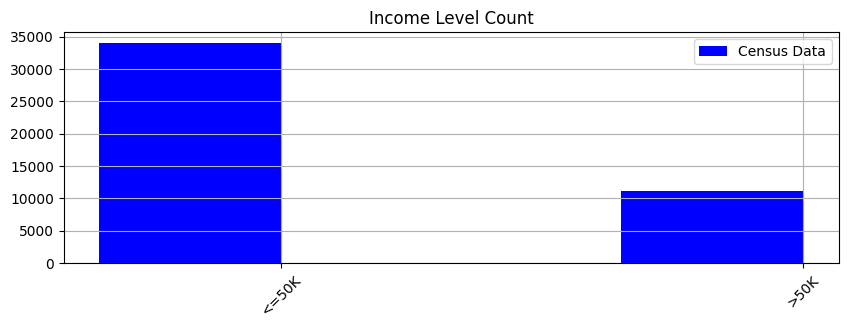

In [25]:
# Create a visualization of the income column 

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['income'].value_counts()
width = 0.35

index = np.arange(len(train_work_counts.index))

plt.bar(index - width/2, train_work_counts.values, width, label='Census Data', color='blue')

plt.xticks(index, train_work_counts.index, rotation=45)
plt.title('Income Level Count')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Let's drop all records with country not equal to United-States because the majority of the records are from the United States
# Non US Countries are not well represented in the dataset
# Total NON US records being removed were 3919
census_combined_df = census_combined_df[census_combined_df['native-country'] == 'United-States']

In [27]:
# Check how many rows of census_combined_df
census_combined_df.shape

(41254, 15)

#### Now we work with 41,254 records out of 48,840 original data

-------------------------

## Pre-Spilt Encoding, Binary Classification, Dimensionality Reduction
### Transform datasets from object for the following columns into Binary / Numeric values:
   * hours-per-week 
   * age
   * sex
   * marital-status
   * income
   * education 
   * occupation
   * workclass
   * race

### Delete these columns because they are not necessary / extra noise:
   * relationship
   * education-num
   * native-country
   
   
   
   
   
   

In [28]:
# Check data type from census_combined_df
census_combined_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [29]:
# Made a copy of the census_combined_df before we do all of our processing 
census_combined_unprocessed_df = census_combined_df.copy() 
census_combined_unprocessed_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


### Feature Column Treatment: 'hours-per-week'

In [30]:
# Categorize the hours per week column to 3 categories
# 1. Less than 30 hours - Part Time = 0
# 2. 30 to 40 hours - Full Time = 1
# 3. More than 40 hours - Over Time = 2
census_combined_df['hours-per-week'] = pd.cut(census_combined_df['hours-per-week'], bins=[0, 30, 40, 100], labels=[0, 1, 2])
census_combined_df['hours-per-week'] = census_combined_df['hours-per-week'].astype('int64')

census_combined_df['hours-per-week'].value_counts().sort_index()

hours-per-week
0     6020
1    22379
2    12855
Name: count, dtype: int64

### Feature Column Treatment: 'age'

In [31]:
# Categorize the age column to 3 categories
# 1. Less than 30 years - Young = 0
# 2. 30 to 50 years - Middle Age = 1
# 3. More than 50 years - Old = 2
census_combined_df['age'] = pd.cut(census_combined_df['age'], bins=[0, 30, 50, 100], labels=[0, 1, 2])
census_combined_df['age'] = census_combined_df['age'].astype('int64')


census_combined_df['age'].value_counts().sort_index()

age
0    12938
1    20325
2     7991
Name: count, dtype: int64

### Feature Column Treatment: 'sex'

In [32]:
# Replace the sex column: male = 0 and female = 1
census_combined_df['sex'] = census_combined_df['sex'].replace({'Male': 0, 'Female': 1})

census_combined_df['sex'].value_counts().sort_index()

sex
0    27797
1    13457
Name: count, dtype: int64

### Feature Column Treatment: 'marital-status'

In [33]:
# Replace the marital-status column to binaries
census_combined_df['marital-status'] = census_combined_df['marital-status'].replace({
    'Divorced': 0,
    'Never-married': 0,
    'Widowed': 0,
    'Married-civ-spouse': 1,
    'Married-AF-spouse': 1,
    'Married-spouse-absent': 1,
    'Separated': 1
})

census_combined_df['marital-status'].value_counts().sort_index()

marital-status
0    20459
1    20795
Name: count, dtype: int64

### Feature Column Treatment: 'income'

In [34]:
# Replace the income column: <=50K = 0 and >50K = 1
census_combined_df['income'] = census_combined_df['income'].replace({'<=50K': 0, '>50K': 1})

census_combined_df['income'].value_counts().sort_index()

income
0    30812
1    10442
Name: count, dtype: int64

### Feature Column Treatment: 'education'

In [35]:
"""
Categorize the education column to 4 categories
0. Early Education (Preschool & Primary)
	•	Preschool (Ages 3-5) – Nursery, Pre-Kindergarten
	•	Primary School (Ages 5-11) – Kindergarten to Grade 5
1. Secondary Education (Middle & High School)
	•	Middle School (Ages 11-14) – Grades 6-8
	•	High School (Ages 14-18) – Grades 9-12
2. Higher Education (Undergraduate Studies)
	•	Associate’s Degree (Optional, ~2 years)
	•	Bachelor’s Degree (Typically 4 years)
3. Advanced Education (Graduate & Doctoral Studies)
	•	Master’s Degree (1-3 years)
	•	Doctorate (Ph.D., M.D., J.D., etc., 3+ years)"
"""
census_combined_df['education'] = census_combined_df['education'].replace({
    'Preschool': 0,
    '1st-4th': 0,
    '5th-6th': 0,
    '7th-8th': 1,
    '9th': 1,
    '10th': 1,
    '11th': 1,
    '12th': 1,
    'HS-grad': 1,
    'Some-college': 2,
    'Assoc-acdm': 2,
    'Assoc-voc': 2,
    'Bachelors': 2,
    'Masters': 3,
    'Doctorate': 3,
    'Prof-school': 3
})

census_combined_df['education'].value_counts().sort_index()

education
0      205
1    18089
2    19506
3     3454
Name: count, dtype: int64

In [36]:
# Ordinal encode the education column
education_order = [
    "Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th",
    "11th", "12th", "HS-grad", "Some-college", "Assoc-voc",
    "Assoc-acdm", "Bachelors", "Masters", "Prof-school", "Doctorate"
]
# Create an OrdinalEncoder with the specified category order
ordinal_encoder = OrdinalEncoder(categories=[education_order])

census_combined_df['education'].value_counts().sort_index()

education
0      205
1    18089
2    19506
3     3454
Name: count, dtype: int64

### Feature Column Treatment: 'occupation'

In [37]:
# Format the Occupation column to binary where 0 = Blue Collar and 1 = White Collar
census_combined_df['occupation'] = census_combined_df['occupation'].replace({
   'Farming-fishing': 0,
   'Protective-serv': 0,
   'Machine-op-inspct': 0,
   'Other-service': 0,
   'Craft-repair': 0,
   'Transport-moving': 0,
   'Handlers-cleaners': 0,
   'Armed-Forces': 0,
   'Priv-house-serv': 0,
   'Prof-specialty': 1,
   'Adm-clerical': 1,
   'Exec-managerial': 1,
   'Tech-support': 1,
   'Sales': 1,
})

census_combined_df['occupation'].value_counts().sort_index()

occupation
0    18616
1    22638
Name: count, dtype: int64

### Feature Column Treatment: 'workclass'

In [38]:
# Clean workclass column
# Replace the workclass column to binaries
# 0 = Private
# 1 = Self-employed and Without-pay
# 2 = Government
census_combined_df['workclass'] = census_combined_df['workclass'].replace({
    'Private': 0,
    'Self-emp-not-inc': 1,
    'Self-emp-inc': 1,
    'Without-pay': 1,
    'State-gov': 2,
    'Federal-gov': 2,
    'Local-gov': 2
})
census_combined_df['workclass'].value_counts().sort_index()

workclass
0    30110
1     5044
2     6100
Name: count, dtype: int64

### Feature Column Treatment: 'race'

In [39]:
# Categorize the Race column to 5 categories
# 0 = White
# 1 = Black
# 2 = Asian-Pac-Islander
# 3 = Amer-Indian-Eskimo
# 4 = Other
census_combined_df['race'] = census_combined_df['race'].replace({
    'White': 0,
    'Black': 1,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 3,
    'Other': 4
})
census_combined_df['race'].value_counts().sort_index()    

race
0    36312
1     3960
2      397
3      417
4      168
Name: count, dtype: int64

### Columns to be dropped

In [40]:
# Drop relationship column, extra noise we don't need
# Instead, we will use the marital-status column
census_combined_df = census_combined_df.drop(columns=['relationship'])

In [41]:
# Drop the education num column - this is extra noise we don't need
# instead, we will use the education column
census_combined_df = census_combined_df.drop(columns=['education-num'])

In [42]:
# Drop native-country column, since everything already changed to USA
census_combined_df = census_combined_df.drop(columns=['native-country'])

## Feature Engineering - Create new column 'assets'
Capital gain and loss doesn't give us very much information unless we understand an individual is in the positive or negative so we'll create a new column assets that better describes a persons gain or loss (postive number of how much they gained and negative number of how much they lost.)

In [43]:
# Create new column assets by capital-gain - capital-loss
census_combined_df['assets'] = census_combined_df['capital-gain'] - census_combined_df['capital-loss']

# Drop capital-gain and capital-loss columns
census_combined_df = census_combined_df.drop(['capital-gain', 'capital-loss'], axis=1)
census_combined_df.head(20)

,age,workclass,fnlwgt,education,marital-status,occupation,race,sex,hours-per-week,income,assets
0,1,1,83311,2,1,1,0,0,0,0,0
1,1,0,215646,1,0,0,0,0,1,0,0
2,2,0,234721,1,1,0,1,0,1,0,0
4,1,0,284582,3,1,1,0,1,1,0,0
6,2,1,209642,1,1,1,0,0,2,1,0
7,1,0,45781,3,0,1,0,1,2,1,14084
8,1,0,159449,2,1,1,0,0,1,1,5178
9,1,0,280464,2,1,1,1,0,2,1,0
11,0,0,122272,2,0,1,0,1,0,0,0
12,1,0,205019,2,0,1,1,0,2,0,0


In [44]:
# Check unique values in the each column
for column in census_combined_df.columns:
    print(column)
    print(census_combined_df[column].unique())
    print()

age
[1 2 0]

workclass
[1 0 2]

fnlwgt
[ 83311 215646 234721 ... 173449  89686 350977]

education
[2 1 3 0]

marital-status
[1 0]

occupation
[1 0]

race
[0 1 4 2 3]

sex
[0 1]

hours-per-week
[0 1 2]

income
[0 1]

assets
[    0 14084  5178 -2042 -1408  5013  2407 14344 -1902 15024  7688  4064
 -1719 -1762  4386 -1564 -2179 -1816 -1980 -1977  7298 -1876 -1340 -2206
  1409  3674 -1741  1055 -1485 -1887  2050 -2339 -2415  2176  2174   594
 -1380 20051  6849  4101  8614  3411 -1721  2597 25236 -2051  4650 -2377
 -1669 -2352  2463  3103 -1672  -653 10605 -2392  2964  3325 -1504  2580
  3471 -1590  4865 99999  6514 -1628  1471  2329 -1848  2105 -2001  2885
 10520 -1740  2202 -2002  2961 27828  6767  2228 -1579  1506  2635 -2258
  5556 -1602  4787  3137 -2547  3818   914   401  2829  2977  4934 -2205
 -1726 -2444  2062 -1138 -2238  2354  3464  5455  1424  -625  3273 22040
  -213  4416 10566  4931 -1539  -880  7430 34095  6497  3908   114 -1668
  2346 -1594 -2231 -1844 13550  -810 -2824  290

In [45]:
# Check the data type of each column
census_combined_df.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
marital-status    int64
occupation        int64
race              int64
sex               int64
hours-per-week    int64
income            int64
assets            int64
dtype: object

-------------------------

## Variance Inflation Factor (VIF) test to assess multicolinearity
 

In [46]:
# Drop target column
# We will use this column to create our y_train and y_test
X_vif = census_combined_df.drop(columns=["income"])

In [47]:
# One-hot encode any categorical features
X_vif = pd.get_dummies(X_vif, drop_first=True)

In [48]:
# Add constant to the features for VIF calculation
from statsmodels.tools.tools import add_constant
X_vif_const = add_constant(X_vif)

In [49]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i + 1) for i in range(X_vif.shape[1])]

In [50]:
# Print VIF results
print(vif_data.sort_values(by="VIF", ascending=False))

          feature       VIF
4  marital-status  1.337165
7             sex  1.316403
5      occupation  1.305202
3       education  1.271846
0             age  1.147282
8  hours-per-week  1.126921
1       workclass  1.060961
9          assets  1.024348
6            race  1.018301
2          fnlwgt  1.006378


-------------------------

## Train Test Split

In [51]:
# Define X and Y
X = census_combined_df.drop('income', axis=1)
y = census_combined_df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Verify the shapes of the training and testing sets
print(X_train.shape)
print(X_test.shape)

(30940, 10)
(10314, 10)


-------------------------

## Post-Split Scaling and Encoding

#### Here we'll apply a standard scaler to the 'fnlwgt' and 'asset' columns


In [52]:
# Define scarler object
scaler = StandardScaler()

# Create the scaled train and test data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit the StandardScaler to X_train on the 'fnlwgt' column
X_train_scaled[['fnlwgt', 'assets']] = scaler.fit_transform(X_train_scaled[['fnlwgt', 'assets']])

# Apply the scaler to the test set
X_test_scaled[['fnlwgt', 'assets']] = scaler.transform(X_test_scaled[['fnlwgt', 'assets']])  

# Preview the scaled data
display(print(X_train_scaled.head(10)))
display(print(X_test_scaled.head(10)))

       age  workclass    fnlwgt  education  marital-status  occupation  race  \
14103    2          0 -0.369480          3               1           1     0   
8290     2          0  2.058962          1               1           1     0   
2492     0          0  2.178215          1               0           0     0   
5773     2          2 -0.908636          2               0           1     1   
18114    0          2 -0.304818          2               0           1     0   
21231    2          1 -0.498547          1               1           0     0   
13428    2          2 -0.649826          1               0           1     0   
18017    0          0 -0.430534          2               0           1     0   
19618    0          0  2.020731          1               0           0     0   
2737     1          2  1.330383          2               1           0     4   

       sex  hours-per-week    assets  
14103    0               1 -0.136174  
8290     0               2 -0.136174  
24

None

       age  workclass    fnlwgt  education  marital-status  occupation  race  \
19220    0          2 -0.397459          2               0           0     1   
12331    2          0 -1.300750          1               0           0     1   
8024     2          1 -1.283215          1               1           0     0   
1525     1          0 -0.267352          1               0           0     0   
16194    0          0  0.159299          1               0           1     0   
21118    2          2 -0.011864          1               0           1     0   
13653    1          2 -1.219145          3               1           1     0   
15416    2          1 -0.481995          2               0           0     1   
25958    2          0 -0.846694          1               0           1     0   
4636     1          0  0.154240          2               1           1     0   

       sex  hours-per-week    assets  
19220    0               1 -0.388331  
12331    0               2 -0.136174  
80

None

-------------------------

## Logistic Regression Model

(Insert reason for starting with Logistic Regression Model)

In [53]:
# Create the model and fit the scaled data into LogisticRegression()
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict the test set
y_pred = model.predict(X_test_scaled)

# Calculate the F1 score
# Assuming the positive class is '>50K' (as in the common census income dataset)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6126473740621651


In [54]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8248012410316076


## Visualize the Model

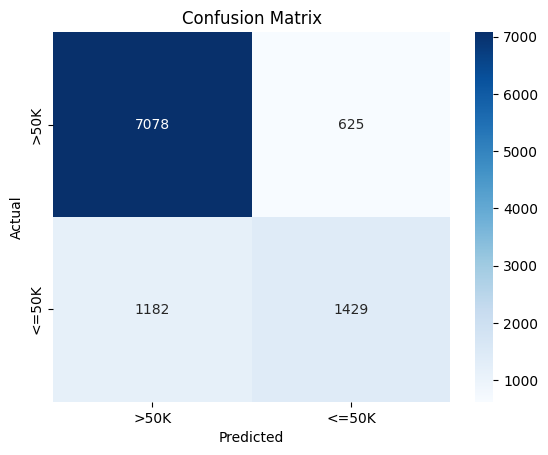

In [55]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['>50K', '<=50K'], yticklabels=['>50K', '<=50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Inspecting Model Coefficients

In [56]:
# Create an array of feature names
feature_names = list(X_train.columns)

# Retrieve the coefficients from the model (assuming a binary classification logistic regression)
coefficients = model.coef_[0]

# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
# Compute absolute value for sorting
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()

# Sort by absolute coefficient value
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)
print(coef_df.head(10))

          feature  coefficient  abs_coefficient
4  marital-status     2.214350         2.214350
9          assets     1.910620         1.910620
3       education     0.915188         0.915188
5      occupation     0.888156         0.888156
8  hours-per-week     0.686466         0.686466
0             age     0.524510         0.524510
7             sex    -0.486509         0.486509
6            race    -0.161047         0.161047
2          fnlwgt     0.068354         0.068354
1       workclass    -0.000902         0.000902


Inspecting the model coefficients above, it looks like marital status has the most influence on whether an individual makes over 50K. Since we did a binary numeric categorization of marital status where 0 = single and 1 = Married, married couples make money together.

Next feature that had influence is occupation and then education.

Capital loss is the weakest of the feature columns to have any affect on income level.

## Try another model to improve F1 score


Let's run a loop that prints the accuracy score for all kinds of different models

In [57]:
## Do everything in a loop
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__}: Train Accuracy = {train_score:.4f}, Test Accuracy = {test_score:.4f}, Accuracy = {accuracy:.4f}")

# Define a list of models to evaluate.
models = [
    GradientBoostingClassifier(random_state=1),
    ExtraTreesClassifier(random_state=1),
    RandomForestClassifier(random_state=1),
    DecisionTreeClassifier(random_state=1),
    KNeighborsClassifier(n_neighbors=3),
    AdaBoostClassifier(random_state=1),    
    LogisticRegression(random_state=1),
]

# Loop over each model, train and evaluate.
for model in models:
    train_and_evaluate_model(model, X_train, X_test, y_train, y_test)

GradientBoostingClassifier: Train Accuracy = 0.8550, Test Accuracy = 0.8490, Accuracy = 0.8490
ExtraTreesClassifier: Train Accuracy = 0.9961, Test Accuracy = 0.7941, Accuracy = 0.7941
RandomForestClassifier: Train Accuracy = 0.9958, Test Accuracy = 0.8050, Accuracy = 0.8050
DecisionTreeClassifier: Train Accuracy = 0.9961, Test Accuracy = 0.8010, Accuracy = 0.8010
KNeighborsClassifier: Train Accuracy = 0.8578, Test Accuracy = 0.7469, Accuracy = 0.7469
AdaBoostClassifier: Train Accuracy = 0.8400, Test Accuracy = 0.8345, Accuracy = 0.8345
LogisticRegression: Train Accuracy = 0.7901, Test Accuracy = 0.7853, Accuracy = 0.7853


## Random Forest Model

From the accuracy summary above, we'll try Random Forest to see any notable difference.

In [58]:
# Create the model and fit the scaled data into LogisticRegression()
model_rf = RandomForestClassifier(n_estimators=500, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Predict the test set
y_pred_rf = model.predict(X_test_scaled)

# Calculate the F1 score
# Assuming the positive class is '>50K' (as in the common census income dataset)
f1_rf = f1_score(y_test, y_pred)
print(f"F1 Score:", f1_rf)

F1 Score: 0.6126473740621651


In [59]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8248012410316076


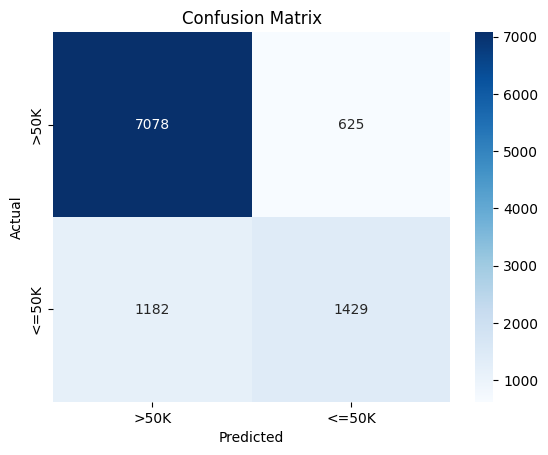

In [60]:
# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['>50K', '<=50K'], yticklabels=['>50K', '<=50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


We got a worse F1 score so maybe we'll stick with the logistic regression model. It is a binary classification so perhaps the logistic regression was the best model to use?



## Fine tune the LogisticRegression model

In [61]:
pipeline_lr = Pipeline(steps=[
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10, 100, 1000]
}

# Set up GridSearchCV to fine-tune the logistic regression model for the best F1 score
grid_search = GridSearchCV(pipeline_lr, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='f1')

In [62]:
# Print out the best parameters and best F1 score from cross-validation
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l1'}
Best Cross-Validation F1 Score: 0.6221958843707485


In [63]:
# Evaluate the tuned model on the test set
y_pred = grid_search.predict(X_test_scaled)
test_f1 = f1_score(y_test, y_pred)
print("Test Set F1 Score:", test_f1)

Test Set F1 Score: 0.6135389888603257


We're getting a lower F1 score so this more hyper parameter tuning is needed.

## Create a simplified DF by dropping negligle columns

Looking at the coefficients, let's remove the last three feature columns 'fnlwght' and 'workclass' to simplify and run the model through logistic regression.

In [64]:
# Verify the census_combined_df
census_combined_df.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,race,sex,hours-per-week,income,assets
0,1,1,83311,2,1,1,0,0,0,0,0
1,1,0,215646,1,0,0,0,0,1,0,0
2,2,0,234721,1,1,0,1,0,1,0,0
4,1,0,284582,3,1,1,0,1,1,0,0
6,2,1,209642,1,1,1,0,0,2,1,0
7,1,0,45781,3,0,1,0,1,2,1,14084
8,1,0,159449,2,1,1,0,0,1,1,5178
9,1,0,280464,2,1,1,1,0,2,1,0
11,0,0,122272,2,0,1,0,1,0,0,0
12,1,0,205019,2,0,1,1,0,2,0,0


In [65]:
# Make a copy of the census_combined_df and drop the columns 'fnlwgt' and 'workclass'
census_combined_simplified_df = census_combined_df.drop(columns=['fnlwgt', 'workclass'])
census_combined_simplified_df.head()

,age,education,marital-status,occupation,race,sex,hours-per-week,income,assets
0,1,2,1,1,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0
2,2,1,1,0,1,0,1,0,0
4,1,3,1,1,0,1,1,0,0
6,2,1,1,1,0,0,2,1,0


## Train Test Split census_combined_simplified_df

In [66]:
# Define X and Y
X = census_combined_simplified_df.drop('income', axis=1)
y = census_combined_simplified_df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Verify the shapes of the training and testing sets
print(X_train.shape)
print(X_test.shape)

(30940, 8)
(10314, 8)


### Well apply SMOTE to balance our data from census_combined_simplifed_df

In [67]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 23092, 1: 7848})
After SMOTE: Counter({0: 23092, 1: 23092})


### Redo Logistic Regression with the balanced data and simplified DF

In [68]:
# Create the model and fit the scaled data into LogisticRegression()
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Predict the test set
y_pred = model.predict(X_test)

# Calculate the F1 score
# Assuming the positive class is '>50K' (as in the common census income dataset)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6383832150570812


In [69]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7727360868722125


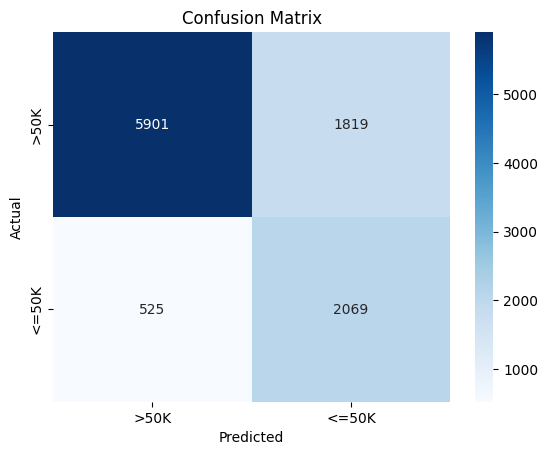

In [70]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['>50K', '<=50K'], yticklabels=['>50K', '<=50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Let's re-run the census_combined_simplified_df through the GradientBoostingClassifier()

In [71]:
# Create the model and fit the data into GradientBoostingClassifier()
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict the test set
y_pred = model.predict(X_test)

# Calculate the F1 score
# Assuming the positive class is '>50K' (as in the common census income dataset)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6844275293371392


### Apply the model XGBClassifier()

In [72]:
# Create the model and fit the data into GradientBoostingClassifier()
model = XGBClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict the test set
y_pred = model.predict(X_test)

# Calculate the F1 score
# Assuming the positive class is '>50K' (as in the common census income dataset)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6908408877774305


We're getting a better F1 score withe GradientBooster, SMOTE and dropping negligible columns.

In [73]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8082218343998449


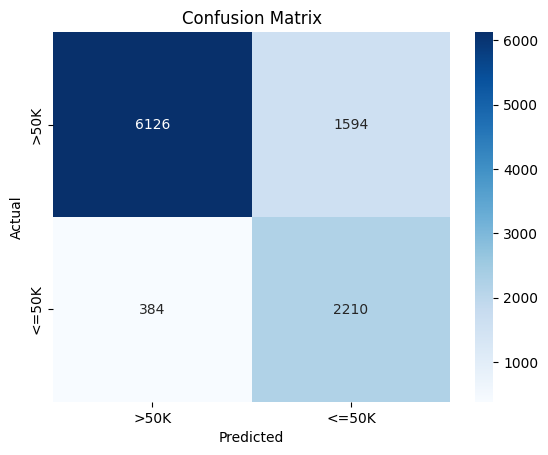

In [74]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['>50K', '<=50K'], yticklabels=['>50K', '<=50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Our F1 score improved so we can try fine tuning from here.

## Correlation Matrix Analysis

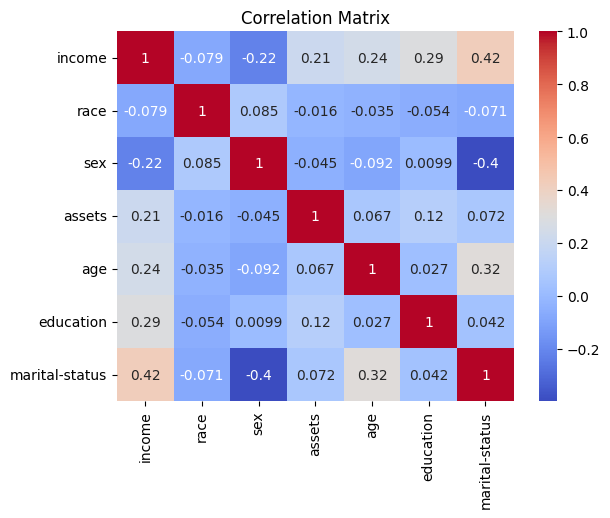

In [75]:
## Create a corrlation heatmap
corr = census_combined_df[['income', 'race', 'sex', 'assets', 'age', 'education', 'marital-status']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## What is the granular correlation between 'Race' and 'Income?'

In [76]:
# Create a contingency table of race vs. income
race_income_table = pd.crosstab(census_combined_unprocessed_df['race'], census_combined_unprocessed_df['income'])
print(race_income_table)

income              <=50K  >50K
race                           
Amer-Indian-Eskimo    365    52
Asian-Pac-Islander    290   107
Black                3456   504
Other                 146    22
White               26555  9757


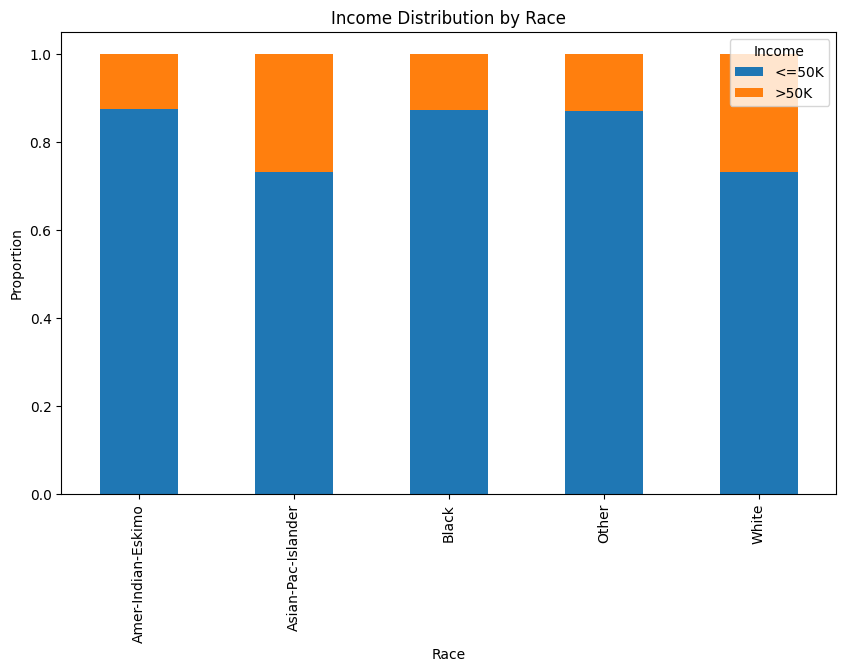

In [77]:
# Visualize the data proportions of race vs income
# Calculate proportions for each race
race_income_prop = race_income_table.div(race_income_table.sum(axis=1), axis=0)

# Plot a stacked bar chart
race_income_prop.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Income Distribution by Race')
plt.ylabel('Proportion')
plt.xlabel('Race')
plt.legend(title='Income')
plt.show()

In [78]:
# For this example, let's just focus on the 'race' feature and income
X = census_combined_df[['race']]
y = census_combined_df['income']

# One-hot encode the race feature
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Print the coefficients with their corresponding race category names
race_feature_names = encoder.get_feature_names_out(['race'])
coef_df = pd.DataFrame({
    'Race Feature': race_feature_names,
    'Coefficient': model.coef_[0]
})
print(coef_df)


  Race Feature  Coefficient
0       race_0     0.301712
1       race_1    -0.657086
2       race_2     0.332268
3       race_3    -0.633231
4       race_4    -0.641900


### Breakdown of Race Features
    'White': 0,
    'Black': 1,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 3,
    'Other': 4

Positive coefficients indicate that the race category increases the log odds of earning >50K (assuming >50K is coded as the positive class), while negative coefficients indicate the opposite.


## What is the granular correlation correlation between 'Education' and 'Income?'

In [79]:
# Create a table for 'education' vs 'income'
education_income_table = pd.crosstab(census_combined_df['education'], census_combined_df['income'])
print(education_income_table)

income         0     1
education             
0            196     9
1          15521  2568
2          13803  5703
3           1292  2162


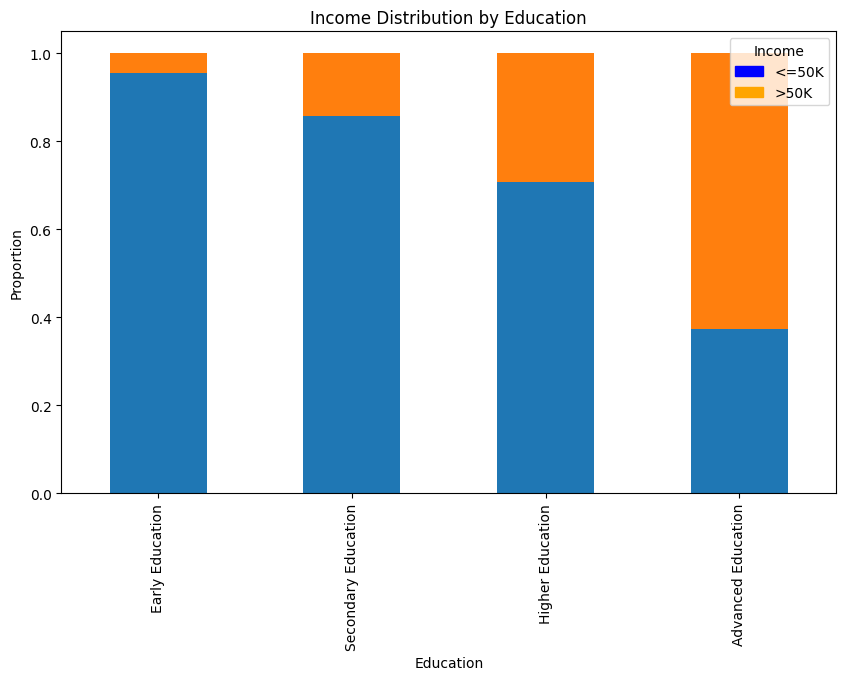

In [80]:
# Visualize the data proportions of education vs income
# Calculate proportions for 'education'
education_income_prop = education_income_table.div(education_income_table.sum(axis=1), axis=0)

# Create a variable for custom legend handles
legend_handles = [
    mpatches.Patch(color='blue', label='<=50K'),
    mpatches.Patch(color='orange', label='>50K')
]
# Plot a stacked bar chart
education_income_prop.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Income Distribution by Education')
plt.ylabel('Proportion')
plt.xlabel('Education')
plt.xticks([0, 1, 2, 3,], ['Early Education', 'Secondary Education', 'Higher Education', 'Advanced Education'], rotation=90)
plt.legend(title='Income', handles=legend_handles)
plt.show()

In [81]:
# Feature is 'education' and target is 'income'
X = census_combined_df[['education']]
y = census_combined_df['income']

# One-hot encode the education feature
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Print the coefficients with their corresponding education category names
education_feature_names = encoder.get_feature_names_out(['education'])
coef_df = pd.DataFrame({
    'Education Feature': education_feature_names,
    'Coefficient': model.coef_[0]
})

print(coef_df)

  Education Feature  Coefficient
0       education_0    -1.882099
1       education_1    -0.786275
2       education_2     0.132819
3       education_3     1.526081


    'Preschool': 0,
    '1st-4th': 0,
    '5th-6th': 0,
    '7th-8th': 1,
    '9th': 1,
    '10th': 1,
    '11th': 1,
    '12th': 1,
    'HS-grad': 1,
    'Some-college': 2,
    'Assoc-acdm': 2,
    'Assoc-voc': 2,
    'Bachelors': 2,
    'Masters': 3,
    'Doctorate': 3,
    'Prof-school': 3

Reading the value of the coefficients, a person is more likely to earn less than 50K if they only completed an education level up to 12th grade, so without a high school GED. A Person who has completed high school and their bachelor's in college is partially likely to earn more than 50k and for someone who has completed a masters or doctorate program is very likely to earn more than 50k.

## What is the granular correlation correlation between 'Age' and 'Income?'

In [82]:
# Create a table for 'age' vs 'income'
age_income_table = pd.crosstab(census_combined_df['age'], census_combined_df['income'])
print(age_income_table)

income      0     1
age                
0       12054   884
1       13452  6873
2        5306  2685


In [83]:
# Visualize the data proportions of age vs income
# Calculate proportions for 'age'
age_income_prop = age_income_table.div(age_income_table.sum(axis=1), axis=0)

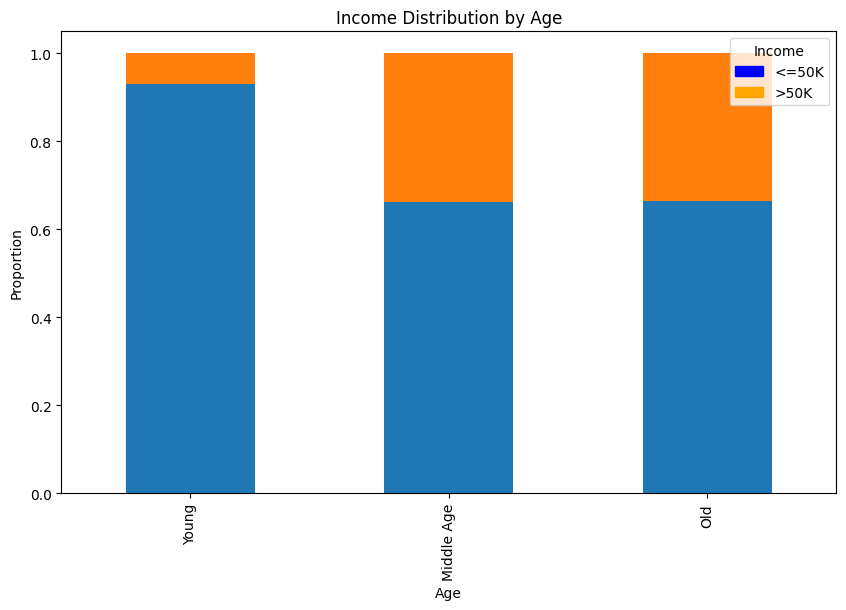

In [84]:
# Create a variable for custom legend handles
legend_handles = [
    mpatches.Patch(color='blue', label='<=50K'),
    mpatches.Patch(color='orange', label='>50K')
]
# Plot a stacked bar chart
age_income_prop.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Income Distribution by Age')
plt.ylabel('Proportion')
plt.xlabel('Age')
plt.xticks([0, 1, 2], ['Young', 'Middle Age', 'Old'], rotation=90)
plt.legend(title='Income', handles=legend_handles)
plt.show()

In [85]:
# Feature is 'age' and target is 'income'
X = census_combined_df[['age']]
y = census_combined_df['income']

# One-hot encode the education feature
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Print the coefficients with their corresponding age category names
age_feature_names = encoder.get_feature_names_out(['age'])
coef_df = pd.DataFrame({
    'Age Feature': age_feature_names,
    'Coefficient': model.coef_[0]
})
print(coef_df)

  Age Feature  Coefficient
0       age_0    -1.611881
1       age_1     0.322634
2       age_2     0.301667


Reading the coefficients, Middle and Older aged people are likely to make more than 50k.